# DebyeBenchmarker 
In this notebook, we'll demonstrate how to use the DebyeBenchmarker class to benchmark nanoparticle generation and Debye calculations on your machine.

In [8]:
# Import necessary modules and functions
from debyecalculator.utility.benchmark import DebyeBenchmarker
from debyecalculator.utility.benchmark import to_csv, from_csv, plot_time_statistics, plot_memory_statistics

# Set up a DebyeBenchmarker instance
radii_to_benchmark = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
function_to_benchmark = 'gr'
benchmarker = DebyeBenchmarker(function = function_to_benchmark, radii=radii_to_benchmark)

# Make folder for benchmarking CSVs
import os
if not os.path.exists('benchmarks/'):
    os.mkdir('benchmarks')

### 1. Benchmarking DebyeCalculator

The `benchmark` method provides the flexibility to generate nanoparticles individually or all at once. Setting the `generate_individually` parameter to `True` generates structures one at a time. However, note that the function is generally more efficient when all structures are generated at the same time - this will however increase the maximum amount of memory needed to keep all structures in memory at once. If `generate_individually == True` timings and memory usage will be displayed as the means across structures. The `repetitions` parameter controls the number of repetitions for the benchmark.

In [9]:
# Benchmark Debye calculator and display statistics (CPU)
benchmarker.set_device('cpu')
stats_cpu = benchmarker.benchmark(generate_individually=True, repetitions=3)
print(stats_cpu)

# Save statistics to a CSV file
csv_path_cpu = 'benchmarks/benchmark_stats_cpu.csv'
to_csv(stats_cpu, csv_path_cpu)

# ---

# Benchmark Debye calculator and display statistics (CUDA), Batch size 10_000
benchmarker.set_device('cuda')
benchmarker.set_batch_size(10_000)
stats_cuda_10k = benchmarker.benchmark(generate_individually=True, repetitions=3)
print(stats_cuda_10k)

# Save statistics to a CSV file
csv_path_cuda_10k = 'benchmarks/benchmark_stats_cuda_10k.csv'
to_csv(stats_cuda_10k, csv_path_cuda_10k)

# ---

# Benchmark Debye calculator and display statistics (CUDA), Batch size: 1_000
benchmarker.set_device('cuda')
benchmarker.set_batch_size(1_000)
stats_cuda_1k = benchmarker.benchmark(generate_individually=True, repetitions=3)
print(stats_cuda_1k)

# Save statistics to a CSV file
csv_path_cuda_1k = 'benchmarks/benchmark_stats_cuda_1k.csv'
to_csv(stats_cuda_1k, csv_path_cuda_1k)

Benchmarking Calculator...:   0%|          | 0/10 [00:00<?, ?it/s]

+-----------------------------------------------------------------------------------------------------------+
|                       benchmark_structure.cif / gr / DEVICE:CPU / BATCH SIZE: 10000                       |
+------------+------------+----------+---------+-----------------------------+------------------------------+
| Radius [Å] | Num. atoms | Mean [s] | Std [s] | MaxAllocCUDAMem (Gen.) [MB] | MaxAllocCUDAMem (Calc.) [MB] |
+------------+------------+----------+---------+-----------------------------+------------------------------+
|        2.0 |          2 |  0.01607 | 0.01702 |                     0.00000 |                      0.00000 |
|        4.0 |         30 |  0.00274 | 0.00035 |                     0.00000 |                      0.00000 |
|        6.0 |         88 |  0.01660 | 0.00137 |                     0.00000 |                      0.00000 |
|        8.0 |        219 |  0.10422 | 0.00946 |                     0.00000 |                      0.00000 |
|       10

Benchmarking Calculator...:   0%|          | 0/10 [00:00<?, ?it/s]

+-----------------------------------------------------------------------------------------------------------+
|                       benchmark_structure.cif / gr / DEVICE:CUDA / BATCH SIZE: 10000                      |
+------------+------------+----------+---------+-----------------------------+------------------------------+
| Radius [Å] | Num. atoms | Mean [s] | Std [s] | MaxAllocCUDAMem (Gen.) [MB] | MaxAllocCUDAMem (Calc.) [MB] |
+------------+------------+----------+---------+-----------------------------+------------------------------+
|        2.0 |          2 |  0.00279 | 0.00049 |                     0.13056 |                      9.43411 |
|        4.0 |         30 |  0.00454 | 0.00059 |                     0.13107 |                     11.45856 |
|        6.0 |         88 |  0.00529 | 0.00181 |                     0.13158 |                     44.69453 |
|        8.0 |        219 |  0.01496 | 0.00034 |                     0.16282 |                    116.66995 |
|       10

Benchmarking Calculator...:   0%|          | 0/10 [00:00<?, ?it/s]

+-----------------------------------------------------------------------------------------------------------+
|                       benchmark_structure.cif / gr / DEVICE:CUDA / BATCH SIZE: 1000                       |
+------------+------------+----------+---------+-----------------------------+------------------------------+
| Radius [Å] | Num. atoms | Mean [s] | Std [s] | MaxAllocCUDAMem (Gen.) [MB] | MaxAllocCUDAMem (Calc.) [MB] |
+------------+------------+----------+---------+-----------------------------+------------------------------+
|        2.0 |          2 |  0.00480 | 0.00161 |                     0.13056 |                      9.43411 |
|        4.0 |         30 |  0.00893 | 0.00536 |                     0.13107 |                     11.45856 |
|        6.0 |         88 |  0.01169 | 0.00148 |                     0.13158 |                     13.75386 |
|        8.0 |        219 |  0.02538 | 0.00163 |                     0.16282 |                     14.26074 |
|       10

### 2. Load and Display Statistics from CSV
Now, let's load the statistics from the CSV files we saved earlier and display the tables.

In [12]:
# Load statistics from the CSV files and display them
loaded_stats_cpu = from_csv(csv_path_cpu)
loaded_stats_cuda_10k = from_csv(csv_path_cuda_10k)
loaded_stats_cuda_1k = from_csv(csv_path_cuda_1k)

print("\nLoaded Calculator Statistics CPU:")
print(loaded_stats_cpu)

print("\nLoaded Calculator Statistics CUDA (batch size 10k):")
print(loaded_stats_cuda_10k)

print("\nLoaded Calculator Statistics CUDA (batch size 1k):")
print(loaded_stats_cuda_1k)


Loaded Calculator Statistics CPU:
+-----------------------------------------------------------------------------------------------------------+
|                       benchmark_structure.cif /  gr / DEVICE: CPU / BATCH SIZE: 10000                     |
+------------+------------+----------+---------+-----------------------------+------------------------------+
| Radius [Å] | Num. atoms | Mean [s] | Std [s] | MaxAllocCUDAMem (Gen.) [MB] | MaxAllocCUDAMem (Calc.) [MB] |
+------------+------------+----------+---------+-----------------------------+------------------------------+
|        2.0 |          2 |  0.01607 | 0.01702 |                     0.00000 |                      0.00000 |
|        4.0 |         30 |  0.00274 | 0.00035 |                     0.00000 |                      0.00000 |
|        6.0 |         88 |  0.01660 | 0.00137 |                     0.00000 |                      0.00000 |
|        8.0 |        219 |  0.10422 | 0.00946 |                     0.00000 |       

### 4: Plotting Benchmark Results

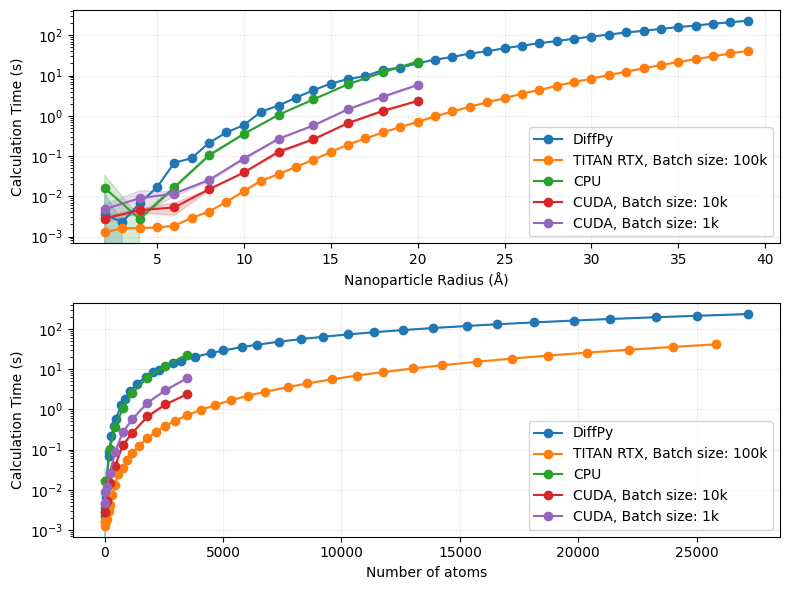

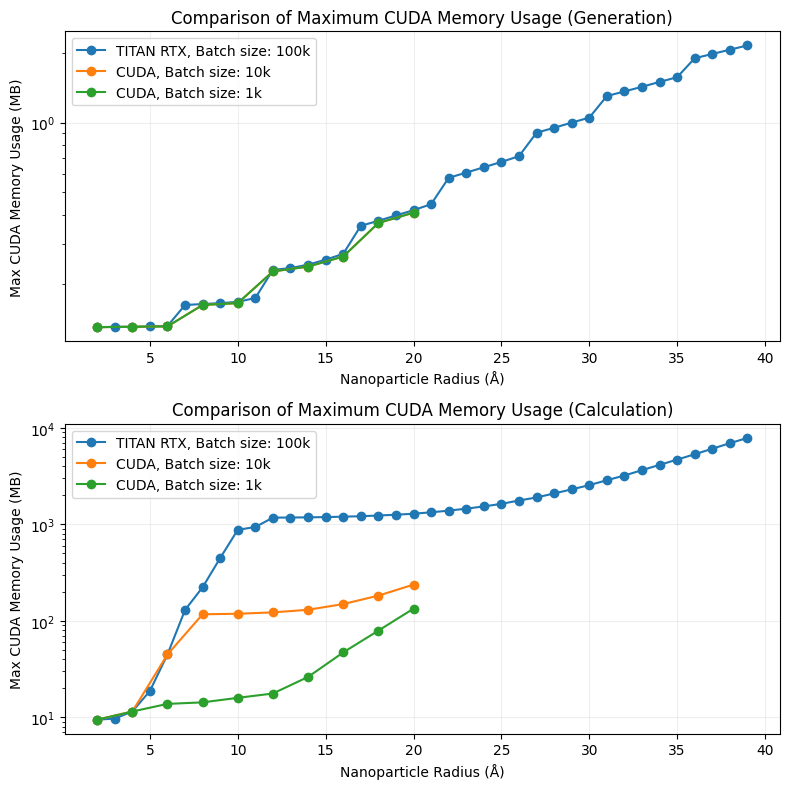

In [16]:
plot_time_statistics(
    statistics = [loaded_stats_cpu, loaded_stats_cuda_10k, loaded_stats_cuda_1k],
    labels = ['CPU', 'CUDA, Batch size: 10k', 'CUDA, Batch size: 1k'],
    include_references=True, 
    log_scale=True
)
plot_memory_statistics(
    statistics = [loaded_stats_cuda_10k, loaded_stats_cuda_1k],
    labels = ['CUDA, Batch size: 10k', 'CUDA, Batch size: 1k'],
    include_references=True,
    log_scale = True,
)